In [4]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Import Audio

In [6]:
bad_file = "media/bad_bearing.wav"
good_file = "media/good_bearing.wav"

## Listen to audio files

In [1]:
from IPython.display import Audio 
Audio('media/bad_bearing.wav', autoplay=False)

In [2]:
from IPython.display import Audio 
Audio('media/good_bearing.wav', autoplay=False)

In [7]:
# load audio files with librosa
bad, sr = librosa.load(bad_file)
good, _ = librosa.load(good_file)

## Basic information regarding audio files

In [9]:
bad.shape

(44086,)

In [10]:
good.shape

(44086,)

In [11]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [12]:
# total number of samples in audio file
tot_samples = len(bad)
tot_samples

44086

In [13]:
# duration of audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 1.9993650793650795 seconds


## Visualising audio signal in the time domain 

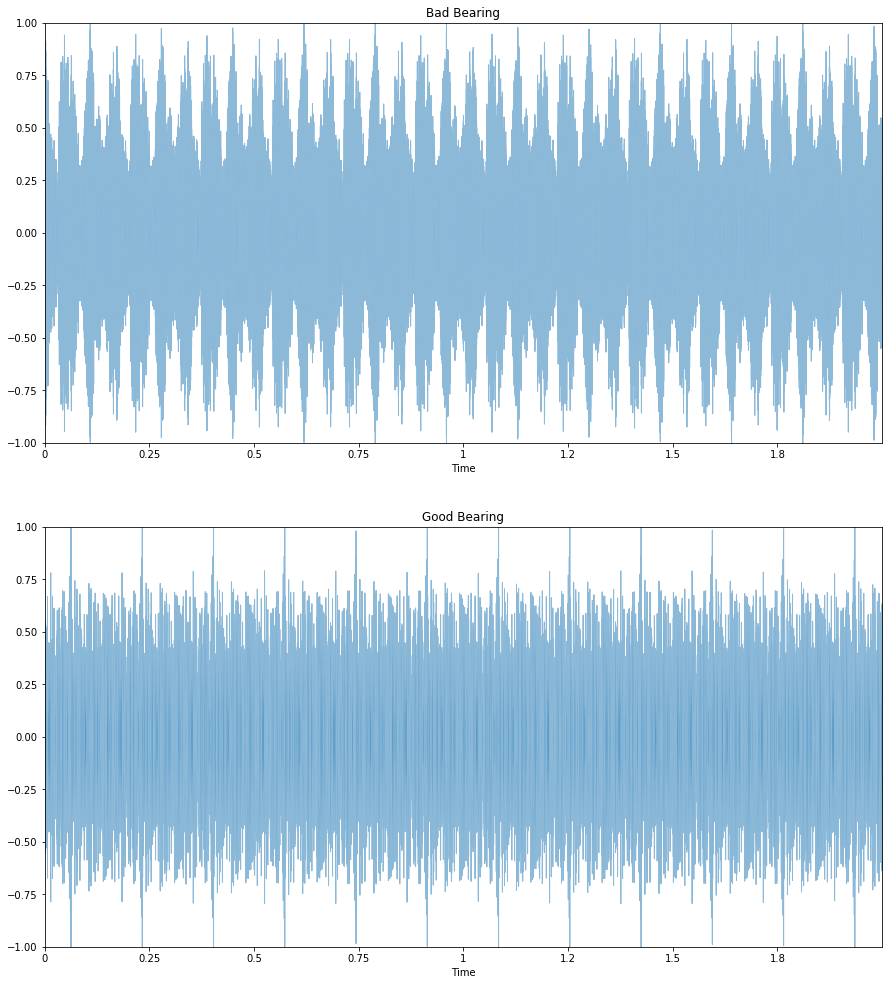

In [47]:
plt.figure(figsize=(15, 17))

plt.subplot(2, 1, 1)
librosa.display.waveplot(bad, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Bad Bearing")

plt.subplot(2, 1, 2)
librosa.display.waveplot(good, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Good Bearing")

plt.show()

## Calculating amplitude envelope

In [41]:
FRAME_SIZE = 256
HOP_LENGTH = 16

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [42]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [43]:
# number of frames in amplitude envelope
ae_bad = amplitude_envelope(bad, FRAME_SIZE, HOP_LENGTH)
len(ae_bad)

2756

In [44]:
# calculate amplitude envelope for bad and good bearings
ae_bad = amplitude_envelope(bad, FRAME_SIZE, HOP_LENGTH)
ae_good = amplitude_envelope(good, FRAME_SIZE, HOP_LENGTH)

## Visualising amplitude envelope

In [45]:
frames = range(len(ae_bad))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

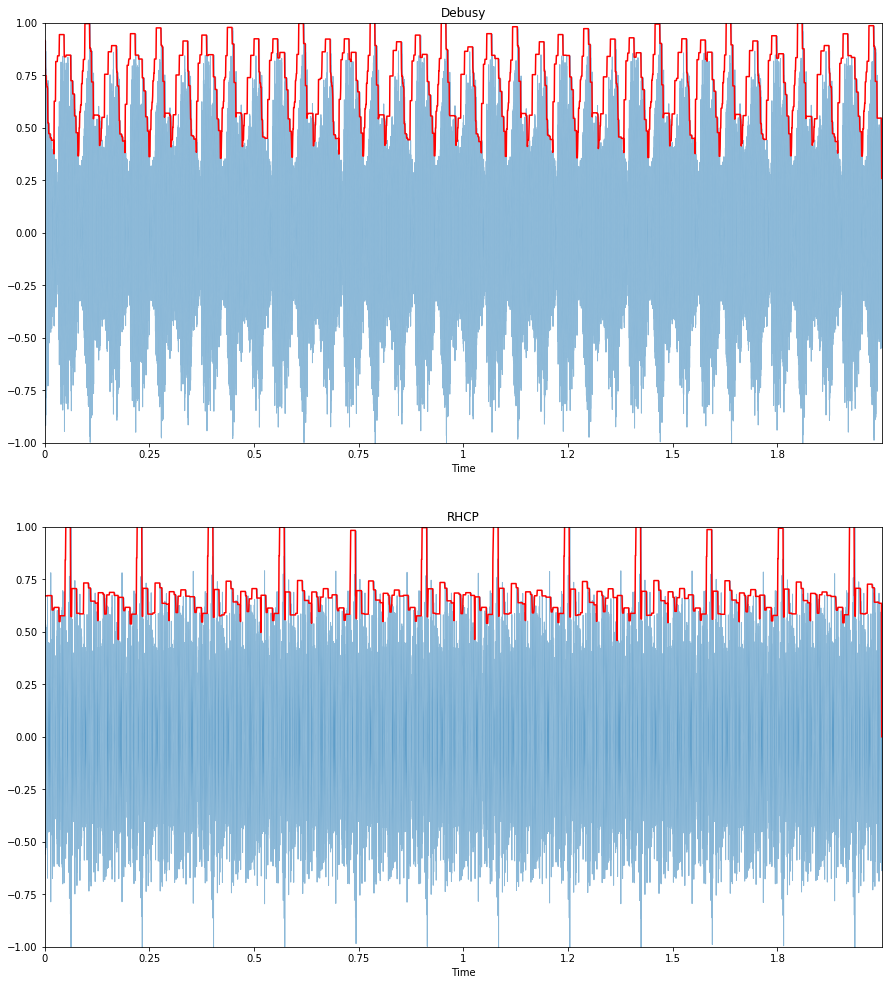

In [46]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(bad, alpha=0.5)
plt.plot(t, ae_bad, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(2, 1, 2)
librosa.display.waveplot(good, alpha=0.5)
plt.plot(t, ae_good, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.show()